In [1]:
import pandas as pd
import numpy as np
filename='iris.xls'
data=pd.read_excel(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
#data_Nulls= data.loc[data.isna().any(axis=1), :]
data_Nulls=data

*The data_Nulls is just a copy of data, created so that if the data_Nulls is messed during coding, we need not repeat the read_excel each time*

# Handling null values

**Above is a dataframe that was got by importing from iris.xls and has rows which have atleast one null value. We can see that the missing values are in the columns SL,SW and PL.**

There are no missing values in the PW and Classification columns. 

**Therefore, now, creating a dataframe which will hold the mean values of SL, SW and PL for each of the three species, for null handling**

In [3]:
classification=['Iris-setosa','Iris-versicolor','Iris-virginica']
mean_SL=[]
for i in np.arange(len(classification)):
    mean_SL.append(data['SL'][(data['Classification']==classification[i])].mean())
print(mean_SL)

mean_SW=[]
for i in np.arange(len(classification)):
    mean_SW.append(data['SW'][(data['Classification']==classification[i])].mean())
print(mean_SW)

mean_PL=[]
for i in np.arange(len(classification)):
    mean_PL.append(data['PL'][(data['Classification']==classification[i])].mean())
print(mean_PL)

[5.008510638297872, 5.925, 6.616666666666666]
[3.4085106382978725, 2.7812500000000004, 2.96734693877551]
[1.46875, 4.252083333333333, 5.547916666666667]


In [4]:
zipped = list(zip(classification, mean_SL, mean_SW, mean_PL ))
data_means = pd.DataFrame(zipped, columns=['Classification', 'mean_SL', 'mean_SW', 'mean_PL'])
data_means=data_means.set_index('Classification')
data_means

,mean_SL,mean_SW,mean_PL
Classification,,,
Iris-setosa,5.008511,3.408511,1.468750
Iris-versicolor,5.925000,2.781250,4.252083
Iris-virginica,6.616667,2.967347,5.547917


**Now replacing all the NaN values in the original dataframe using the mean values from the data_means dataframe**

In [5]:
#for i in classification:
#    data_Nulls[classification[i]]=data_Nulls[classification[i]].fillna()

#data_Nulls['SL'] = data_Nulls.SL.apply(lambda x: x if not pd.isnull(x) else data_means.at[data_Nulls['Classification'],'mean_SL'])
for x in classification:
    val=data_means.loc[x,'mean_SL']
    print(x)
    print(val)
    data_Nulls.loc[(data_Nulls["Classification"] == x) & (data_Nulls["SL"].isna()), 'SL'] = val
#    data_Nulls['SL'] = data_Nulls['SL'].where(data_Nulls['SL'].isnull() & data_Nulls['Classification']==x, val)
#    data_Nulls.loc[(data_Nulls['Classification'].eq(x)) & (data_Nulls['SL'].eq(np.NaN)), 'SL'] = val



Iris-setosa
5.008510638297872
Iris-versicolor
5.925
Iris-virginica
6.616666666666666


In [6]:
for x in classification:
    val=data_means.loc[x,'mean_SW']
    print(x)
    print(val)
    data_Nulls.loc[(data_Nulls["Classification"] == x) & (data_Nulls["SW"].isna()), 'SW'] = val

Iris-setosa
3.4085106382978725
Iris-versicolor
2.7812500000000004
Iris-virginica
2.96734693877551


In [7]:
for x in classification:
    val=data_means.loc[x,'mean_PL']
    print(x)
    print(val)
    data_Nulls.loc[(data_Nulls["Classification"] == x) & (data_Nulls["PL"].isna()), 'PL'] = val

Iris-setosa
1.46875
Iris-versicolor
4.252083333333333
Iris-virginica
5.547916666666667


**Verifying that the nulls are all replaced in the dataset**

In [8]:
data_Nulls.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data_Nulls.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.850059,3.052369,3.756250,1.198667
std,0.822129,0.426127,1.758949,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Splitting data into training and testing

In [10]:
X=data_Nulls.drop('Classification', axis=1)
y=data_Nulls['Classification']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [12]:
X_train.shape

(120, 4)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=500)
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [15]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
#print("Precision is: ", precision_score(y_test,y_pred))--can be used along with the average='macro' parameter since target is multiclass
#print("Recall is: ", recall_score(y_test,y_pred))--can be used along with the average='macro' parameter since target is multiclass
#print("f1 score is: ", f1_score(y_test,y_pred))--can be used along with the average='macro' parameter since target is multiclass

Accuracy is:  1.0


In [16]:
ser1=pd.DataFrame(y_test)
ser1.reset_index(inplace=True)
ser2=pd.DataFrame(y_pred)
ser2 = ser2.rename(columns = {0:'Classification'})
ser2.reset_index(inplace=True)

In [17]:
pd.merge(ser1,ser2,left_index=True,right_index=True)
#ser1.join(ser2)

,index_x,Classification_x,index_y,Classification_y
0,73,Iris-versicolor,0,Iris-versicolor
1,18,Iris-setosa,1,Iris-setosa
2,118,Iris-virginica,2,Iris-virginica
3,78,Iris-versicolor,3,Iris-versicolor
4,76,Iris-versicolor,4,Iris-versicolor
5,31,Iris-setosa,5,Iris-setosa
6,64,Iris-versicolor,6,Iris-versicolor
7,141,Iris-virginica,7,Iris-virginica
8,68,Iris-versicolor,8,Iris-versicolor
9,82,Iris-versicolor,9,Iris-versicolor


**As seen above the test data, and the predicted data are exactly the same when looking at Classification**

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [19]:
acc_values

[0.9666666666666667,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

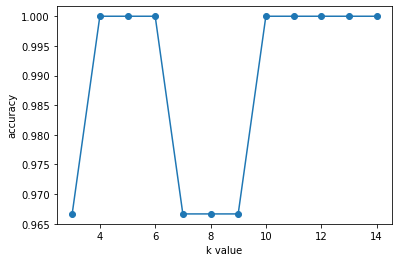

In [20]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**As seen above, the accuracy values are highest for the k value of (4,5,6, 10,11...14). So, we shall proceed with k=4 for our KNN model**

In [21]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [25]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='macro'))
print("Recall is: ", recall_score(y_test,y_pred,average='macro'))
print("f1 score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [23]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# DT algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy with the Decision tree model is: ", accuracy_score(y_test,y_pred))

Accuracy with the Decision tree model is:  1.0


In [27]:
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Classification, dtype: int64

In [28]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

**As shown in the above confusion matrix, there are zero misclassifications**

# SVM

In [29]:
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred=svm_linear.predict(X_test)

In [31]:
print("Accuracy with the SVM linear model is: ", accuracy_score(y_test,y_pred))

Accuracy with the SVM linear model is:  1.0


# Radial SVM

In [32]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)

SVC()

In [33]:
y_pred=svm_radial.predict(X_test)

In [34]:
print("Accuracy with the SVM radial model is: ", accuracy_score(y_test,y_pred))

Accuracy with the SVM radial model is:  1.0


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [36]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='macro'))
print("Recall is: ", recall_score(y_test,y_pred,average='macro'))
print("f1 score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [37]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

**Feature Importance**

In [38]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

PL    0.435529
PW    0.423250
SL    0.114462
SW    0.026760
dtype: float64

**From above, it can be seen that SW(sepal width) is comparatively of low importance. Since the model is accurate enough, ie, accuracy=1.0 , we do not need to remove that feature**

# Therefore, we can conclude that for the given IRIS dataset, and using the null handling as shown in the above code, all of the classification algorithms(LogReg,KNN,SVM,DT,RF) give an accuracy of 1.0, and so, any of them can be used to create the prediction model